### Load packages

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import Counter
from sklearn.model_selection import train_test_split
import csv
from sklearn.utils.class_weight import compute_class_weight

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

### Load train and test data

In [52]:
filename_train = 'data/train.csv'
filename_test = 'data/test.csv'
train = pd.read_csv(filename_train).fillna("None")
train_na = train.loc[train['NARRATIVE'] == "None"] #sample for which Narrative is missing
train = train.drop(train[(train.X == 0) | (train.Y == 0)].index)
test = pd.read_csv(filename_test).fillna("None")

### visualize XY coordiante data

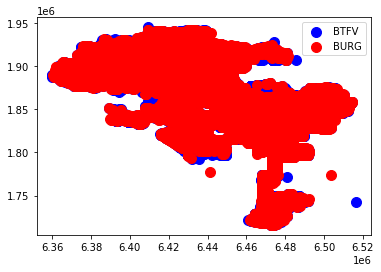

In [46]:
cdict = {"BURG": 'red', "BTFV": 'blue'}
scatter_x = np.array(train['X'])
scatter_y = np.array(train['Y'])
group = np.array(train['CRIMETYPE'])
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

### convert XY coordinate to latitude longitude

In [47]:
import pyproj

transformer = pyproj.Transformer.from_crs("epsg:3857", "epsg:4326")
lat_long = transformer.transform(scatter_x, scatter_y)

### visualize latitude longitude data

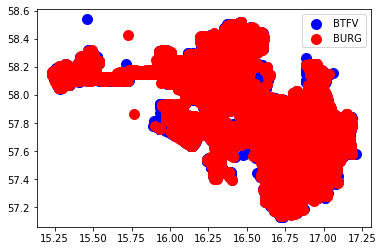

In [48]:
scatter_x = np.array(lat_long[0])
scatter_y = np.array(lat_long[1])
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

In [54]:
Counter(train_na['CRIMETYPE']) #train samples where narratives are missing

Counter({'BTFV': 8451, 'BURG': 578})

In [63]:
len(test.loc[test['NARRATIVE'] == "None"]) #number of test instances where narratives are missing

8840

### Preprocess time data

In [83]:
train['BEGDATE'] = pd.to_datetime(train.BEGDATE, utc=True)
train['BEGDATE'] = train['BEGDATE'].dt.strftime('%Y-%m-%d')

In [87]:
# create new columns for year month and day
train_date = train['BEGDATE'].str.split('-', expand=True)
train['year'] = train_date[0]
train['month'] = train_date[1]
train['day'] = train_date[2]
print(train)

           id     BEGDATE                                          NARRATIVE  \
0      170243  2012-10-31  UNK SUSP ENT VICT'S VEH THROUGH UNLOCKED DOOR ...   
1      176597  2012-12-23   UNK SUSP OPENED SIDE WINDOW TO GAIN ENTRY SUS...   
2       40020  2009-11-09                                               None   
3       63463  2010-05-08  SUSP ADMITTED THAT HE HAS BEEN PLANNING TO GET...   
4      194886  2013-05-31  UNK S POSSIBLY ENTERED V APARTMENT NO PROPERTY...   
...       ...         ...                                                ...   
99995   29483  2009-08-19                                               None   
99996  132624  2011-12-13                         UNK S REMOVED TAB FROM VEH   
99997  107653  2011-05-14  UNK SUSP ENTER CAMPUS FROM AN UNK DIRECTION AN...   
99998   68561  2010-06-19  UNK S REMOVED VICTS REGS TAB FROM REAR LIC PLA...   
99999   84540  2010-10-31  S ENTERED OPEN SHOPPING MALL ENTERED KIOSK AND...   

                 X            Y CRIMETY

### Train a Random Forest model with just XY coordinate data

In [101]:
train = pd.read_csv(filename_train).fillna("None")
train_features = np.array(train[['X', 'Y']])
print(train_features)
train_labels = np.array(train[['CRIMETYPE']])
print(train_labels)

[[6470007.5   1763648.5  ]
 [6480901.5   1802058.8  ]
 [6448486.498 1909028.127]
 ...
 [6428035.5   1921800.3  ]
 [6415960.2   1893347.3  ]
 [6425947.9   1903869.8  ]]
[['BTFV']
 ['BURG']
 ['BTFV']
 ...
 ['BURG']
 ['BTFV']
 ['BURG']]


In [102]:
# using Random Forest
x_sample_train, x_test, y_sample_train, y_test = train_test_split(train_features, train_labels, test_size=0.2) #train and test split

# define the model
model_RF = RandomForestClassifier()
model_RF.fit(x_sample_train, y_sample_train)

# evaluate the model
score = model_RF.score(x_test, y_test)
# report performance
print('Accuracy: %.3f' % (score))

/var/folders/8v/jvp16g0x3fdd6zb1t0n4d_nr0000gn/T/ipykernel_1122/4044175040.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(x_sample_train, y_sample_train)


Accuracy: 0.640
